In [9]:
import requests

# VIX Index data for 1990 to present (Updated Daily)
VIX_SOURCE_URL = 'https://cdn.cboe.com/api/global/us_indices/daily_prices/VIX_History.csv?_gl=1*qv26pd*_up*MQ..*_ga*MTI0MTMzMjA5My4xNzM3ODcwMTYw*_ga_5Q99WB9X71*MTczNzg3MDE2MC4xLjAuMTczNzg3MDE2MC4wLjAuMA..'
VIX_CSV_PATH = '../data/VIX.csv'

response = requests.get(url = VIX_SOURCE_URL)
if response.status_code != 200:
    raise Exception("Error Fetching VIX Data")

with open(VIX_CSV_PATH, "wb") as file:
    file.write(response.content)

In [10]:
import pandas as pd

vix_df = pd.read_csv(VIX_CSV_PATH)

# Convert 'DATE' column to datetime
vix_df["DATE"] = pd.to_datetime(vix_df["DATE"])

# Filter rows where the date is after 2005-01-01
vix_df = vix_df[vix_df["DATE"] > "2005-01-01"].reset_index(drop=True)

# Check if there is N/A
print(vix_df.isna().any().any())

False


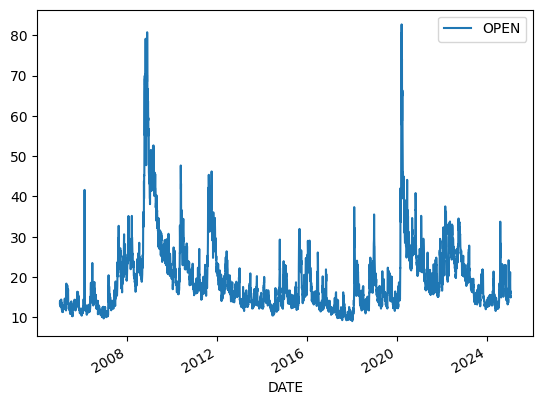

In [11]:
import matplotlib.pyplot as plt

# Plotting the DataFrame
vix_df.plot(x="DATE", y=["OPEN"])

# Display the plot
plt.show()